## Observations and Insights 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Control how many rows of data that is displayed
pd.set_option('display.max_rows', 20)

# Combine the data into a single dataset
combo_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer" )

# Display the data table for preview
combo_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice.
mouse_count = combo_df["Mouse ID"].value_counts()
mouse_count_total = combo_df["Mouse ID"].nunique()
print(f"There are {mouse_count_total} mice used in the study.")
mouse_count

There are 249 mice used in the study.


g989    13
a520    10
v923    10
z581    10
a963    10
        ..
h428     1
l872     1
d133     1
o848     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

    # Looks at Data Frame and returns a true value on rows that have the same Mouse ID AND Timepoint
dup_mouse_check = combo_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

    # Displays all rows with a true value - This shows they are duplicate values
combo_df["Duplicate"] = dup_mouse_check
all_dups_table = combo_df.loc[combo_df["Duplicate"] == True]
all_dups_table

# can use the below table to review list of duplicate rows and decided on how to process

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [73]:
# Optional: Get all the data for the duplicate mouse ID. 

    # Adds the unique values from the all_dups_table to a list
dup_mice = all_dups_table["Mouse ID"].unique().tolist()

    # Displays the rows in where Mouse ID matches the values in the dup_mice list
combo_df[combo_df["Mouse ID"].isin(dup_mice)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

    # Saves indexs of the rows for the mice we found to hold duplicate data in previous steps
mice_index = combo_df[combo_df["Mouse ID"].isin(dup_mice)].index

    # Drops the rows in that are saved in the mice_index (should be the ones we found in our duplicate checking)
final_df = combo_df.drop(mice_index)

    # Remove the Duplicate column we added when we cleaned the data
del final_df["Duplicate"]
final_df = final_df.reset_index()
del final_df["index"]    
    # Cleaned up data frame
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice in the clean DataFrame.
final_mouse_count = final_df["Mouse ID"].value_counts()
final_mouse_count_total = final_df["Mouse ID"].nunique()
print(f"There are {final_mouse_count_total} mice used in the study.")
final_mouse_count


There are 248 mice used in the study.


a520    10
z795    10
a818    10
y865    10
a444    10
        ..
x226     1
l872     1
v199     1
d133     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume.

# This groups the final_df by the     
tumor_regimen_group_df = final_df.groupby(["Drug Regimen"])

mean_tumor = tumor_regimen_group_df["Tumor Volume (mm3)"].mean()
median_tumor = tumor_regimen_group_df["Tumor Volume (mm3)"].median()
var_tumor = tumor_regimen_group_df["Tumor Volume (mm3)"].var()
std_tumor = tumor_regimen_group_df["Tumor Volume (mm3)"].std()
sem_tumor = tumor_regimen_group_df["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
tumor_stats_table_df = pd.DataFrame({"Mean": mean_tumor,
                                     "Median": median_tumor,
                                     "Variance": var_tumor,
                                     "Std Dev": std_tumor,
                                     "SEM": sem_tumor})

tumor_stats_table_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

final_df.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of mice')

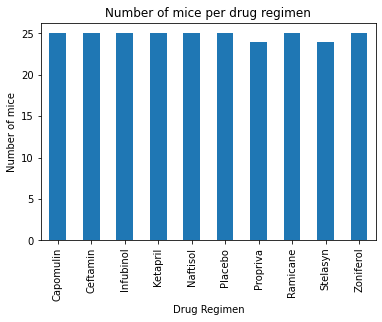

In [78]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Setting up table to only show unique mouse along with associated drug        
mouse_data = final_df[["Mouse ID", "Drug Regimen"]].drop_duplicates(subset=["Mouse ID"])

# groups the mouse_data DF by drug and returns a the number of mouse id each drug has associated with it.
# sets it up as a single column subset of a data frame
mouse_data_group = mouse_data.groupby("Drug Regimen")["Mouse ID"].nunique()

#set plot
mouse_bar_chart = mouse_data_group.plot(kind="bar")

# Smoe titles and lables
mouse_bar_chart.set_title("Number of mice per drug regimen")
mouse_bar_chart.set_ylabel("Number of mice")

Text(0.5, 0, 'Drug Regimen')

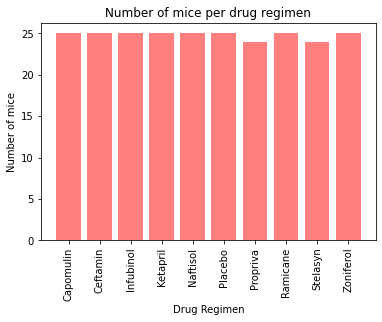

In [79]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# sets value to the above grouping | output (like a table) = Drug Regimen <first line> Capomulin, 25 <second line>  Ceftamin, 25 ..... so on and so fourth
drug = mouse_data_group

# Lists out the number of different variables that would go on the x axis | output = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x_axis = np.arange(len(drug))

# Lists all the drug names as a list in the order they appear in the mouse_data_group DF/table
x_lables = list(drug.index)


# Plot Graph
mouse_drug_plot = plt.bar(x_axis, drug, color='r', alpha=0.5, align="center")

# Lable X axis



# Some titles and lables
plt.title("Number of mice per drug regimen")
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")

Text(0, 0.5, '')

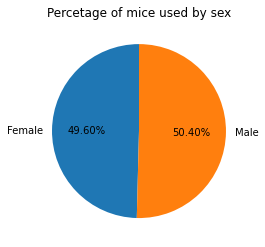

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Setting up table to only show unique mouse along with associated sex 
mouse_data_pie = final_df[["Mouse ID", "Sex"]].drop_duplicates(subset=["Mouse ID"])


# groups the mouse_data_pie DF by sex and returns a the number of mouse id each sex has associated with it.
# sets it up as a single column subset of a data frame
mouse_data_pie_group = mouse_data_pie.groupby("Sex")["Mouse ID"].nunique()

#set plot
mouse_pie_chart = mouse_data_pie_group.plot(kind="pie", autopct='%.02f%%', startangle=90)

# Set Lables
mouse_pie_chart.set_title("Percetage of mice used by sex")
mouse_pie_chart.set_ylabel("")


Text(0.5, 1.0, 'Percetage of mice used by sex')

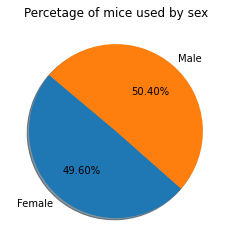

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# sets value to the above grouping | output (like a table) = Sex <first line> Female, 123 <second line>  Male, 125
sex = mouse_data_pie_group

# Lists out the number of different variables that would go on the x axis | output = array([0, 1])
x_axis = np.arange(len(sex))

# # Lists all the sex names as a list in the order they appear in the mouse_data_pie_group DF | output = ['Female', 'Male']
x_lables = list(sex.index)

# Set plot and lables
mouse_sex_plot = plt.pie(sex, labels= x_lables, 
                         autopct="%0.02f%%", shadow=True, startangle=140)
plt.title("Percetage of mice used by sex")

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

###Start by getting the last (greatest) timepoint for each mouse
# ---------------------------------------------------------------
# This code takes the final_df and sets ups a single column series where for each row of the final_df it will look at 
# the Mouse_ID and find all other rows with the same Mouse_ID. The code then looks at this group of rows and return the largest value in the Timepoint column
max_timepoint = final_df.groupby("Mouse ID")["Timepoint"].transform(max)



### Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# ------------------------------------------------------------------------------------------------
# This code takes the single column series and comparies each row (by the index) and looks if the Mouse_ID and value of Timepoint matches each other.
# if they do not then it will remove the row, but if they do they will keep the row.
# In the end we will have one row for each unique Mouse_Id that shows the last row in the Timepoint column
max_timepoint_df = final_df.loc[final_df["Timepoint"] == max_timepoint]


# resets the indexing
max_timepoint_df.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
243,1846,z314,Stelasyn,Female,21,28,5,45.934712,0
244,1849,z435,Propriva,Female,12,26,10,48.710661,0
245,1859,z581,Infubinol,Female,24,25,45,62.754451,3
246,1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [83]:
### Put treatments into a list for for loop (and later for plot labels)

drug_treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

### Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data_list = []

### Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    ### Locate the rows which contain mice on each drug and get the tumor volumes

    # Returns only rows where the value of Drug Regimen is equal to the values in the drug_treatment list
    # Then returns only the columns we want
test_df = max_timepoint_df[max_timepoint_df["Drug Regimen"].isin(drug_treatment)]
test_df = test_df[["Drug Regimen", "Tumor Volume (mm3)"]]


# goes through each row of test_df and if the value of the "Drug Reqimen" column is equal
# to the current value of the drug_treatment it will add the value to the applicable tumor_list
for drug in drug_treatment:

    value_list = [drug]
    tumor_size = test_df[test_df["Drug Regimen"].isin(value_list)]
    
    #Storing a list of tumor volume values for a givin drug regimen to use in box chart plotting
    if drug == "Capomulin":
        tumor_list_cap = tumor_size["Tumor Volume (mm3)"].tolist()
    elif drug == "Ramicane":
        tumor_list_ram = tumor_size["Tumor Volume (mm3)"].tolist()
    elif drug == "Infubinol":
        tumor_list_inf = tumor_size["Tumor Volume (mm3)"].tolist()    
    elif drug == "Ceftamin":
        tumor_list_cef = tumor_size["Tumor Volume (mm3)"].tolist() 




df_for_quartile = tumor_size["Tumor Volume (mm3)"]

### Determine outliers using upper and lower bounds
quartiles = df_for_quartile.quantile([.25,.5,.75,])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = df_for_quartile.loc[(df_for_quartile < lower_bound) | (df_for_quartile > upper_bound)]
print(f"{drug}'s potential outliers: {outliers}")


Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


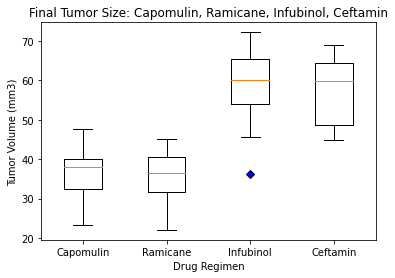

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#set up box plot and lables
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size: Capomulin, Ramicane, Infubinol, Ceftamin")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xticklabels(drug_treatment)
blue_diamond = dict(markerfacecolor='b', marker='D')

# Put data in the box plot, all four data sets in one graph
ax1.boxplot([tumor_list_cap, tumor_list_ram, tumor_list_inf, tumor_list_cef], flierprops=blue_diamond);

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

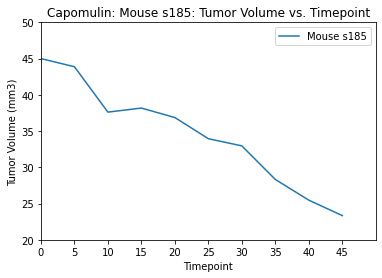

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

    # Show final_df for thoes mice under the Capomulin Regimen
capomulin_mouse_df = final_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]    
capomulin_mouse_df = capomulin_mouse_df.loc[final_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_df = capomulin_mouse_df.loc[capomulin_mouse_df["Mouse ID"] == "s185"]
# capomulin_mouse_df_2 = capomulin_mouse_df.set_index("Timepoint")
# capomulin_mouse_df_2.pop("Tumor Volume (mm3)")

time_l = capomulin_mouse_df["Tumor Volume (mm3)"]
# time_l

x_axis_line = np.arange(len(time_l))
# print(x_axis_line)

time_label = list(capomulin_mouse_df["Timepoint"])
# time_label

mouse_line, = plt.plot(time_label, time_l, label="Mouse s185")


tick_locations = [value for value in time_label]
plt.xticks(tick_locations, time_label)
plt.legend(handles=[mouse_line], loc="best")
plt.xlim(0,50)
plt.ylim(20,50)
plt.title("Capomulin: Mouse s185: Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")



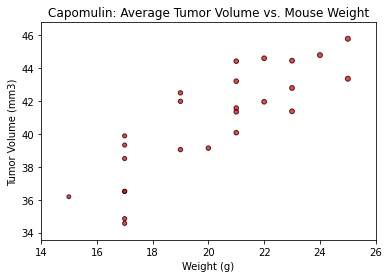

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#set up data, find average tumor per mouse, get weight, and put in final DF
tumor_vol_avrg = capomulin_mouse_df.groupby(["Mouse ID"])
tumor_vol_avrg_2 = tumor_vol_avrg["Tumor Volume (mm3)"].mean()
weight_capomulin = tumor_vol_avrg["Weight (g)"].mean()

scat_plot_df = pd.DataFrame({"Average Tumor": tumor_vol_avrg_2,
                             "Mouse Weight": weight_capomulin})


#set x & y axis
weight = scat_plot_df["Mouse Weight"]
                        
tumor = scat_plot_df["Average Tumor"]

plt.scatter(scat_plot_df["Mouse Weight"], scat_plot_df["Average Tumor"], marker="o", facecolors="red", edgecolors="black",
            s=weight, alpha=0.75)

# Set table scale
x_min = scat_plot_df["Mouse Weight"].min()
y_min = scat_plot_df["Average Tumor"].min()
x_max = scat_plot_df["Mouse Weight"].max()
y_max = scat_plot_df["Average Tumor"].max()
plt.ylim(y_min - 1, y_max + 1)
plt.xlim(x_min - 1, x_max + 1)

# Create a title, x label, and y label for our chart
plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


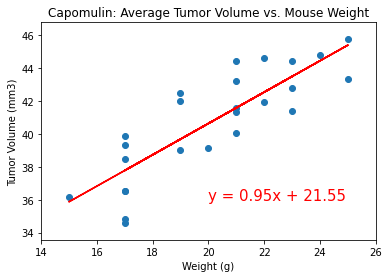

In [161]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

    # table already set up from last step, just adding back in for reference 
plt.title("Capomulin: Average Tumor Volume vs. Mouse Weight")
plt.scatter(weight,tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

x_min = scat_plot_df["Mouse Weight"].min()
y_min = scat_plot_df["Average Tumor"].min()
x_max = scat_plot_df["Mouse Weight"].max()
y_max = scat_plot_df["Average Tumor"].max()
plt.ylim(y_min - 1, y_max + 1)
plt.xlim(x_min - 1, x_max + 1)


    # calculate correlation coefficient
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

    # calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")




    # print graph
plt.show()